In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
EPOCHS = 20


c:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#czemu ta komórka jest istotna?
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
num_classes = len(np.unique(y_train))
print(num_classes)

10


In [8]:
#stwórz sieć neuronową. Pierwsza warstwa już jest. Następnie dodaj warstwę Dense o 128 neuronach i funkcji aktywacji
#relu. Ostatnia warstwa, też Dense, powinna mieć neuronów tyle ile jest klas w zbiorze y_train i funkcję aktywacji
#softmax. Funkcja straty to tym razem 'sparse_categorical_crossentropy'

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
#uruchom uczenie sieci
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.2, callbacks=[es])

Epoch 1/20
1500/1500 [==============================] - 32s 13ms/step - loss: 0.2905 - accuracy: 0.9167 - val_loss: 0.1553 - val_accuracy: 0.9566
Epoch 2/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1277 - accuracy: 0.9628 - val_loss: 0.1107 - val_accuracy: 0.9660
Epoch 3/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0870 - accuracy: 0.9752 - val_loss: 0.1010 - val_accuracy: 0.9699
Epoch 4/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0646 - accuracy: 0.9801 - val_loss: 0.0918 - val_accuracy: 0.9722
Epoch 5/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0477 - accuracy: 0.9859 - val_loss: 0.0906 - val_accuracy: 0.9738
Epoch 6/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0388 - accuracy: 0.9882 - val_loss: 0.0925 - val_accuracy: 0.9725
Epoch 7/20
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0301 - accuracy: 0.9908 - val_loss: 0.0921 -

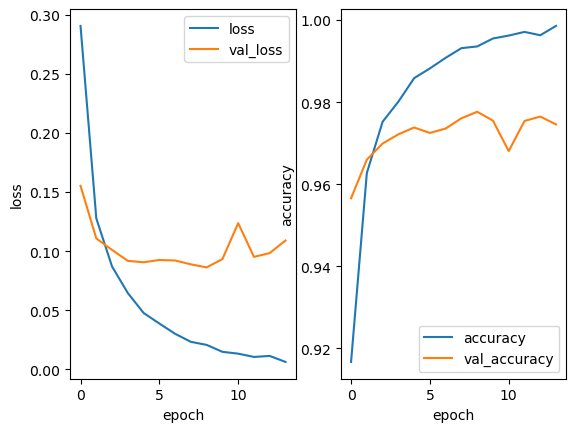

<Figure size 640x480 with 0 Axes>

In [10]:
#przygotuj wykresy funkcji straty i skuteczności
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.subplot(1,2,1)
plt.plot(loss, label = "loss")
plt.plot(val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(acc, label = "accuracy")
plt.plot(val_acc, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.tight_layout()

In [11]:
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


[1.8153507e-08 3.7724237e-13 2.3429379e-08 6.8655339e-05 4.7475961e-18
 1.0070276e-09 3.9401016e-18 9.9993116e-01 4.9830011e-09 1.0690645e-07]


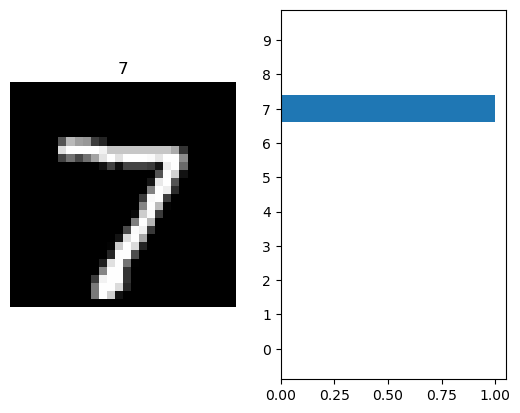

In [12]:
plt.subplot(1,2,1)
plt.imshow(x_test[0], cmap="gray")
plt.axis('off')
plt.title(y_test[0])

plt.subplot(1,2,2)
plt.barh(np.arange(10), y_pred[0])
plt.yticks(np.arange(10))
print(y_pred[0])

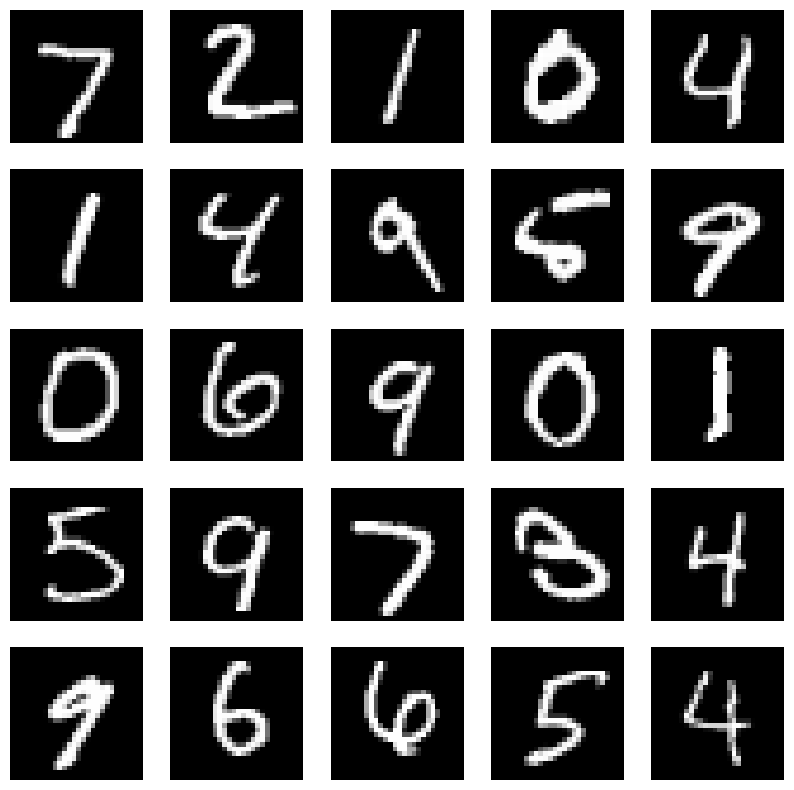

In [13]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')

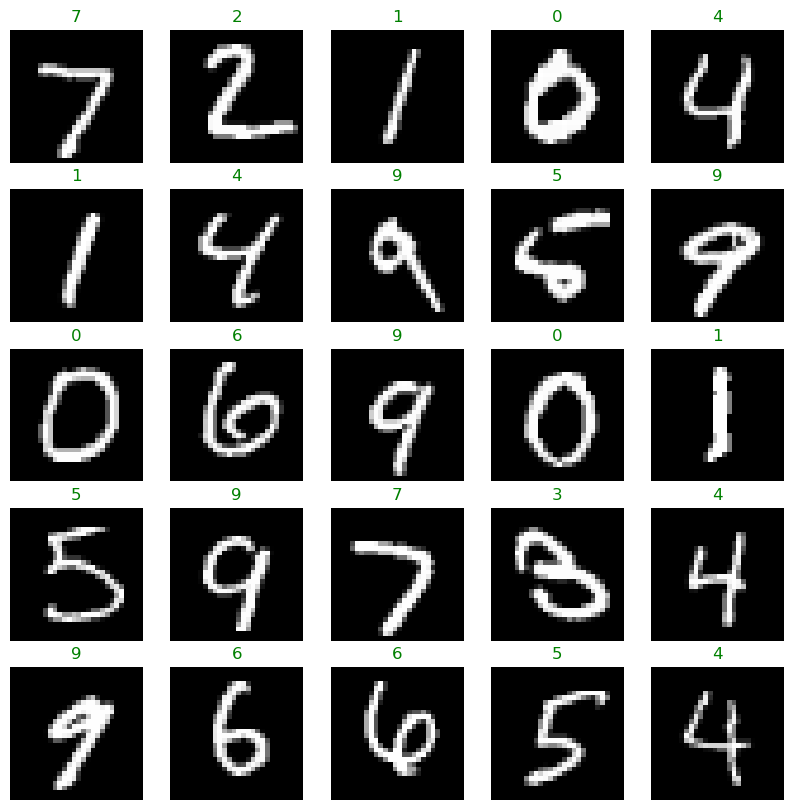

In [14]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    if np.argmax(y_pred[i]) == y_test[i]:
        plt.title(y_test[i], color = 'green')
    else:
        plt.title(y_test[i], color = 'red')